<a href="https://colab.research.google.com/github/ppunkz/CE888_DS/blob/master/Assignment2/berbank%20Russian%20Housing%20Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [0]:
#import train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
## Handling missing values
for i in train.columns:
    if train[i].dtype == 'object':
      train[i] = train[i].fillna(train[i].mode().iloc[0])
    if (train[i].dtype == 'int' or train[i].dtype == 'float'):
      train[i] = train[i].fillna(np.mean(train[i]))

for i in test.columns:
    if test[i].dtype == 'object':
      test[i] = test[i].fillna(test[i].mode().iloc[0])
    if (test[i].dtype == 'int' or test[i].dtype == 'float'):
      test[i] = test[i].fillna(np.mean(test[i]))

In [0]:
## Label encoding
number = LabelEncoder()
for i in train.columns:
    if (train[i].dtype == 'object'):
      train[i] = number.fit_transform(train[i].astype('str'))
      train[i] = train[i].astype('object')

for i in test.columns:
    if (test[i].dtype == 'object'):
      test[i] = number.fit_transform(test[i].astype('str'))
      test[i] = test[i].astype('object')

In [0]:
# Creating a new feature origin
train['origin'] = 0
test['origin'] = 1
training = train.drop('price_doc',axis=1) #droping target variable

In [0]:
## Taking sample from training and test data
training = training.sample(10000, random_state=12)
testing = test.sample(7000, random_state=11)

In [0]:
## Combining random samples
combine = training.append(testing)
y = combine['origin']
combine.drop('origin',axis=1,inplace=True)

In [0]:
## Modelling
model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []
for i in combine.columns:
    score = cross_val_score(model,pd.DataFrame(combine[i]),y,cv=2,scoring='roc_auc')
    if (np.mean(score) > 0.8):
        drop_list.append(i)
        print(i,np.mean(score))

id 1.0
timestamp 0.9144045285714286
life_sq 0.8455408285714286
max_floor 0.8680095571428572
material 0.8547409428571429
build_year 0.9152398857142856
num_room 0.8464369142857142
kitch_sq 0.9581987714285713
state 0.9094977714285715
hospital_beds_raion 0.8905239428571428
cafe_sum_500_min_price_avg 0.8579184142857144
cafe_sum_500_max_price_avg 0.8547958
cafe_avg_price_500 0.8563095857142857


In [0]:
# List   of   drifting   features 
drop_list

['id',
 'timestamp',
 'life_sq',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'hospital_beds_raion',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500']

In [0]:
# Dropping the origin with all the features
training = train.drop('origin',axis=1)
testing = test.drop('origin',axis=1)
# Using a basic random forest model with all the features
rf = RandomForestRegressor(n_estimators=200, max_depth=6,max_features=10)
rf.fit(training.drop('price_doc',axis=1),training['price_doc'])
pred = rf.predict(testing)
rms = sqrt(mean_squared_error(testing['price_doc'],pred))
print(rms)

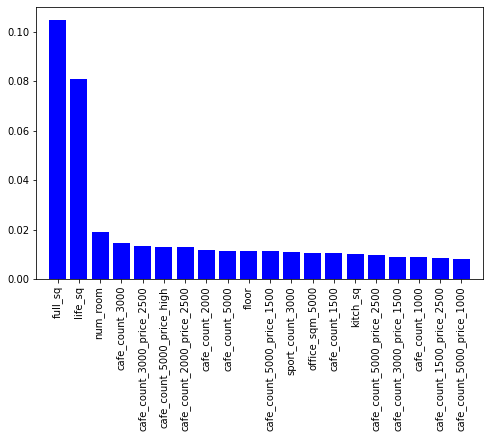

In [0]:
# plotting importances
import matplotlib.pyplot as plt
features = training.drop('price_doc',axis=1).columns.values
imp = rf.feature_importances_
indices = np.argsort(imp)[::-1][:20]
#plot
plt.figure(figsize=(8,5))
plt.bar(range(len(indices)), imp[indices], color = 'b', align='center')
plt.xticks(range(len(indices)), features[indices], rotation='vertical')
plt.xlim([-1,len(indices)])
plt.show()

In [0]:
drop_list

['id',
 'timestamp',
 'life_sq',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'hospital_beds_raion',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500']

In [0]:
# dropping drifting features which are not important.
drift_train = training.drop(['id','hospital_beds_raion','cafe_sum_500_min_price_avg','cafe_sum_500_max_price_avg','cafe_avg_price_500'], axis=1)
drift_test = testing.drop(['id','hospital_beds_raion','cafe_sum_500_min_price_avg','cafe_sum_500_max_price_avg','cafe_avg_price_500'], axis=1)
rf = RandomForestRegressor(n_estimators=200, max_depth=6,max_features=10)
rf.fit(drift_train.drop('price_doc',axis=1),training['price_doc'])
pred = rf.predict(drift_test)
rms = sqrt(mean_squared_error(drift_test['price_doc'],pred))
print(rms)